# SVM and Evaluation

## [Support Vector Machines - Slides](https://github.com/cs109/2015/blob/master/Lectures/10-SVMAndEvaluation.pdf)

- a very common classifier

- **Recap** - with k-NN there is no effort in training. Predicting is very labourous because we need to look through all the data to calculate the majority vote.

#### How can we fix this?

- There must be a more efficient classifier. If we know the decision boundaries then we can quickly classify the data.

# Separating hyperplane

$$ \text{x: data point} $$
$$ \text{y: label }\epsilon \{-1,+1\} $$

![hyperplane](http://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/_images/plot_sgd_separating_hyperplane_1.png)

- The solid black line is the separation between the two classes

$$ \text{w: weight vector} $$

- `w` defines the orientation of the hyperplane and can be visualized as a perpendicular vector with it's origin on the hyperplane. Called the _Orthogonal Vectors_

$$ \text{b: bias} $$

refer to the [slides](https://github.com/cs109/2015/blob/master/Lectures/10-SVMAndEvaluation.pdf) for visuals for how the parameters `w` and `b` transform the hyperplane.

We can then predict the class of a new `x` by evaluating the following formula:

$$ w^{T}x + b < 0 $$

- **unlike k-NN**, I can now let go of all the training data and just hold on to these very few parameters.
    - However, k-NN is more flexible and can handle more linear problems
    - Now we are confined to the decision boundary (i.e. a line (hyperplane))
    - Therefore, we are going to try and keep all the positive aspects of k-NN and the efficiency of a new hyperplane.

# Perceptron
![perceptron](https://cdn-images-1.medium.com/max/1600/1*n6sJ4yZQzwKL9wnF5wnVNg.png)

- this is just a way to calculate this formula $ w^{T}x + b = 0 $ in higher dimensional space.
- [Frank Rosenblatt](https://en.wikipedia.org/wiki/Frank_Rosenblatt)
- This is essentially the basis for every artificial neural network, deep learning application.

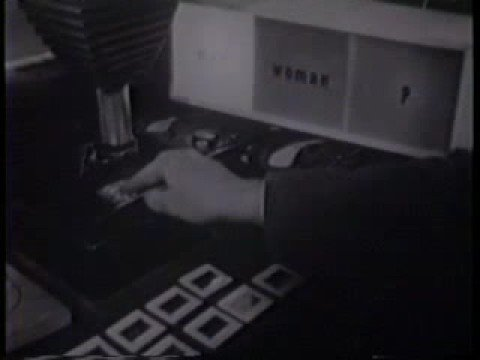

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('cNxadbrN_aI')

# The XOR Problem

## Higher Dimension Separation

- In higher dimensions we are better able to separate our data but we need to avoid the curse of higher dimensions
- We therefore find the lowest number of dimensions that can still accurately separate the data.

# Support Vector Machine

- Widely used for all sorts of classification problems
- Some people say it is the best of the shelf classifiers out there
- It's ability to to move data classes into these higher dimensions for separation is one reason SVM is so popular.
    - You still need to tune some parameters to get SVM to perform really well.
# Maximum Margin Classification
- Tries to ensure generalization to new datasets
- Shown with the dotted line in the first figure above
- The **support vectors** are the points on the maximum margin
- In theory, these **support vectors** are the only points we need to generate the same hyperplane result.
- $ x^{(i)} $ is a data point on the maximum margin and $ {x_{\perp}}^{(i)} $ is that x value perpendicularly projected onto the hyperplane. $ \gamma^{(i)} $ is then the distance between these two `x` values.

- to find $ \gamma $ we normalize `w` to a value of 1 and then compute the number of `w`s are needed to move from $ x^{(i)} \text{ to } {x_{\perp}}^{(i)} $

    - See the slides for a visual of this
$$ {x_{\perp}}^{(i)} = x^{(i)} - \gamma^{(i)} \cdot \frac{w}{\left \| w \right \|} $$

### Why do I want to know $ {x_{\perp}}^{(i)} $ ?

- because, this x value translated to the hyperplane is describable by our formula:
$$ w^{T}{x_{\perp}}^{(i)} + b = 0 $$

With some simple algebra:

$$ \gamma^{(i)} =  y^{(i)}\left (\frac{w^{T}{x_{\perp}}^{(i)} + b}{\left \| w \right \|}\right ) $$
    - We add `y` into the formula to decide between the two classes (+1|-1) from a previous slide.
    
# This is kind of odd
- It cares about the rare data points (support vectors)
- The classifier is only looking for the the points closest to the boundary between the classes.
    - An example would be trying to classify apples and oranges. SVM is concerned with the apple that looks most like an orange and vice versa. There classifier is not concerned with the ideal case of either class.
    
- $ \xi _{i} $ is the slack variable for the classifier

$$ \text{min}_{w,b,\xi } \frac{1}{2}\left \| w \right \|^{2} + C\sum_{i=1}^{n}\xi _{i} $$

And here we see our second hyperparameter $C$

# Quadratic Kernel
- Using higher dimensional space to use linear computation for the decision boundary

## Polynomial

## Radial basis function (RBF)

- Each kernel has its own hyperparameter that needs to be tuned.

# Prediction

- Prediction speed depends on number of support vectors

## Kernel Trick for SVMs
- Arbitrary many dimensions
- Little computational cost
- Maximal margin helps with curse of dimensionality

# Tips and Tricks
- SVMs are not scale invariant
- Check if your library normalizes by default
- Normalize your data
    - mean: 0, std: 1
    - map to \[0,1\] or \[-1,1\]
- Normalize test set in same way!

- RBF kernel is a good default
- For parameters try exponential sequences
- Read:
    - Chih-Wei Hsu et al., "[A Practical Guide to Support Vector Classification](https://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf)"
    
# SVM vs. k-NN
- With k-NN we need to keep all the training data. SVM we only care about the support vectors.
- With k-NN we only have k to tune. SVM we have C and the parameter of our kernel.
    - Which makes SVM more complicated but we gain the max. margin and kernel tricks.

# Parameter Tuning

## Train vs. Test Error

![trainerror](https://www.researchgate.net/profile/Jorge_Santos30/publication/37655851/figure/fig10/AS:669570926911493@1536649557125/Train-error-versus-test-error-and-the-early-stopping-rule.png)
- With cross validation we are trying to find the 'sweet spot.'

# Grid Search Cross Validation
![gamma](http://scikit-learn.org/stable/_images/sphx_glr_plot_rbf_parameters_002.png)

# Error Measures - Confusion Matrix
![confusion](https://www.researchgate.net/profile/MOHD_NIZAR_Hamidon/publication/274408179/figure/fig4/AS:294691712061446@1447271387589/Typical-confusion-matrix-wherein-TP-true-positive-FN-false-negative-FP-false.png)

## TPR and FPR
- True Positive Rate:
$$ \frac{tp}{tp+fn} $$
- False Positive Rate:
$$ \frac{fp}{fp+tn} $$

# Reciever Operating Characteristic (ROC) curve
![ROC](https://www.researchgate.net/profile/Ramkrishna_Mitra/publication/271270751/figure/fig10/AS:272659820838918@1442018575187/Scatter-plot-of-false-positive-rate-and-true-positive-rate-of-MBSTAR-and-other-algorithms.png)

- Very popular summary statistic is the area under your ROC curve.
    - One for your testing and one for training
    
# Precision Recall
- Recall (just a renaming of the TPR):
    - If I pick a random positive example, what is the probability of making the right prediction?
$$ \frac{tp}{tp+fn} $$
- Precision:
    - If I take a positive prediction example, what is the probability that it is indeed a positive example?
$$ \frac{tp}{tp+fp} $$

## Precision Recall Curve
![precision](https://qph.fs.quoracdn.net/main-qimg-ddd56eeeae45bcd95093859b87454e73)

#### Compared to ROC:
![ROC](http://www.chioka.in/wp-content/uploads/2014/04/sample-ROC-curve.png)


# F-measure
- The summary statistic for the PR curve is the harmonic mean or F-measure
    - Weighted average of precision and recall
$$ F_{\beta} = \frac{(\beta^{2}+1) \cdot P \cdot R}{\beta^{2} \cdot P + R} $$

- Usual case: $ \beta = 1 $
- Increasing $ \beta $ allocates weight to recall

# One vs All

## For multi class scenarios

- Train n classifier for n classes
- Take classification with greatest margin
- Slow training

# One vs One
- Train n(n-1)/2 classifiers
- Take majority vote
- Fast training

# Decision Trees And Random Forest

## [Slides](https://github.com/cs109/2015/blob/master/Lectures/11-DecisionTreesAndRandomForest.pdf)

[Elements of Statistical Learning](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)

[Pattern Recognition and Machine Learning 2006](https://www.microsoft.com/en-us/research/people/cmbishop/?from=http%3A%2F%2Fresearch.microsoft.com%2Fen-us%2Fum%2Fpeople%2Fcmbishop%2Fprml#!publications)

## Decision Tree
- If it is relatively small it is interpretable.
- If you are trying to gain insight into a problem, that is difficult to do with a SVM. A decision tree may be a better choice. 
    - Fast training
    - Fast Predicitons
    - Easy to understand
    - Easy to interpret
    
## The Idea
- We are still looking for a decision boundary
- The decision tree partitions our feature space into cells
- At the end of the query we assign our classes to the cells


## A Drawback 
To querying only one feature at a time:
- Is that all the decision boundaries are straight lines
- Diagonals are possible but you need a far greater number of splits in the tree


## Benefits
To querying only one feature at a time:
- Performance is very fast
- This is a very intuitive model
- You do not need to worry about scale (which was very important with SVM)
- Invariant to scale transformations
- The leaf node that you end up in is your class designation
- **Multiclass** is natural and easy

# Decision Tree Training
- Learn the tree structure:
    - which feature to query
    - which threshold to choose

# Node Purity

## Gini Impurity
- This is the default for scikit learn
- Expected error is you randomly selected a sample
- and predict the class of the entire node based on it

### Example:
4 red, 3 green, 3 blue data points
- class probabilities:
    - $\text{red:} \frac{4}{10}$ | $\text{green:} \frac{3}{10}$ | $\text{blue:} \frac{3}{10}$
    - misclassification:
    - $\text{red:} \frac{4}{10} \cdot (\frac{3}{10} + \frac{3}{10}) = 0.24$
    - $\text{green and blue:} \frac{3}{10} \cdot (\frac{4}{10} + \frac{3}{10}) = 0.21$
    
## gini impurity

$0.24 + 0.21 + 0.21 = 0.66$

- Number of classes: $C$
- Number of data points: $N$
- Number of data points of class i: $N_{i}$

$$I_{G} = \sum_{i=1}^{C} \frac{N_{i}}{N} \left ( 1 - \frac{N_{i}}{N} \right )$$

![gini impurity](https://www.bogotobogo.com/python/scikit-learn/images/Entropy/ImpurityIndicesPlot.png)

- gini index and entropy are similar
- The misclassification error is normally what we are interested in regards to a classifier. However it is seldom used.
    - This is because the derivative of the misclassification error is not easy to get.
    - The gini impurity tends to make more sense and examples are coming.
    
# Node Purity Gain
- Compare:
    - Gini impurity of parent node
    - Gini impurity of child nodes
$$\Delta I_{G} = I_{G}(A) - \frac{N(B)}{N(A)} I_{G}(B) - \frac{N(C)}{N(A)} I_{G} (C)$$

We weigh the split based on the number of points that go to the various nodes.

## Misclassification
$$\frac{1}{N} \sum_{i}^{N} 1(\hat{y_{i}} \neq y_{i})$$

- not differentiable - (we have problems getting the derivative of this)
- Binary problem: 400 samples per class
- If we look at two different splits:
    - node 1: 100|300   node 2: 300|100
        - Misclassification: 0.25
        - Gini gain: 0.125
    - node 1: 200|400   node 2: 200|0
        - Misclassification: 0.25
        - Gini gain: 0.166
- The gini gain weighs the pure cell more favourably

## Pseudocode
- Check if already finished
- For each feature $x_{i}$
    - Calculate the gain form splitting on $x_{i}$
    - Let $x_{best} be the feature with highest gain$
- Create a decision _node_ that splits on $x_{best}$
- Repeat on the sub-nodes

- **Does this produce an optimal tree?**
- **What does optimal tree mean?**

## When to Stop
- node contains only one class
- node contains less than $x$ data points
- max depth is reached
- node purity is sufficient
- you start to overfit => cross-validation

- Decision trees tend to overfit
    - We can continue to partition the feature space until there is a boundary around each data point.
    
# Tree Pruning

# Decision Trees vs SVM

![Comparison](https://lh6.googleusercontent.com/a6Xwk3EwPc3fYf1-Jp5GuMeNxTcg2t5v3zLK_7BsQ-Vef17YZsDcz2lcsl2MG20sNfX2lK4Jr3Gk4PUyvJoKectH_T4sqUo0UYDtH3i6bzRk3cQYvUyo-yuASFo_puqR56W6EPjy)

***

# Netflix Prize

## Ensemble Methods
- A single decision tree does not perform well
- But, it is super fast
- What is we learn multiple trees

    - We need to make sure they do not all just learn the same.

# Bootstrap
- Resampling method from statistics
- Useful to get error bars on estimates

- Take N data points
- Draw N times with replacement

- Get estimate from each bootstrapped sample

- **Can I do cross validation on this?**
    - No, there will be cross over in the data because it is done with replacement.

# Bagging
- **B**ootstrap **agg**regat**ing**
- Sample with replacement from your data set
- Learn a classifier for each bootstrap sample
- Average the results

# Bias-Variance Trade-off
![Trade-off](https://lh6.googleusercontent.com/Vhz2O_vbSYi3gkmZG94m5ES4I_suAcXgg0SzKdOkbbPyq5tuLjF3X4cm5Faz9_6sF5vx34u29h8_QRlOFZxQYzC-WVEZaiNUvq1Ruyw2C36_jlWsNv5vkeUfGuDwpiuuE2AVHOVT)

- The green line is the function that generated the training data. 
- The chaotic lower left set show bootstrap samples with high variance.
- The lower right is the average of those samples and the result fits the original distribution quite well.

## Bagging
- Reduces overfitting (variance)
- Normally uses one type of classifier
- Decision trees are popular
- **Not helping with linear models**
    - already very restricted in terms of variance
- Easy to parallelize
    - Once you have all your bootstrap samples, you can train them in parallel
    
# Random Forest
- Builds upon the idea of bagging
- Each tree build from bootstrap sample
- Node splits calculated from **random feature** subset

## Classification Trees
- In a classification problem, the output is categorical.
- Each branch of the tree (collection of feature values) leads to a different leaf (output value).

## Regression Trees
- The leaves of the tree still form a partition of the output space, but there are many possible values within each bin.
- How do we assign a single value? We take the mean among values assigned to that bin.

# Tree Order
- It's clear that the order of branches in a decision tree matters
- Less transparent is how the path to each leaf is constructed.
- This happens according to an iterative approach called entropy minimization (greedy algorithm, branch on highest information gain feature at each step).
- Unless you're familiar with information theory, the intuition behind entropy minimization may not be obvious.
- Our problem is the following: given a set of features, how do we partition the output space as finely as possible, as quickly as possible?


# Example: 'Guess Who' game

## Low Information Gain
- It's typical to ask questions link whether the character "wears glasses" or "has white hair."
- These questions represent features with low information gain.
- More likely than not, the answer will be no and we will have eliminated only a few possibilities.

## High Information Gain
- A higher information gain feature will partition the data as evenly as possible.
- What is we just list half of the available characters and ask if the opponent's character is in that set?
- Membership in one-half of the characters is a feature which perfectly bisects the data
- We are guaranteed to eliminate exactly half of the possibilities
- In the general case (of n characters), we can identify the target character with only $log_2(n)$ operations.

# Forest from Trees
- Overfitting is a well-known pitfall for decision trees.
- For example, if we add an additional 1000 characters onto the board, asking about 12 characters from before is a bad question and will almost certainly underperform "white hair."
- Overcoming this pitfall is the purpose of random forests.
- To avoid overfitting with a single tree, we build an ensemble model through a procedure called bagging.

# Ensemble Models
- An ensemble model is one made by combining other models
- The average of many unbiased predictors with high variance is an unbiased predictor with low(er) variance.

# Bagging Procedure
- For some number of trees, T, and predetermined depth, D, select a random subset of the data (convension is roughly 2/3 with replacement)
- Train a decision tree on that data using a subset of the available features (roughly sqrt(M) by convention, where M is the total number of features).

- If you feel that your features are largely independent, then having a deep decision tree does not make very much sense.

# Parameter Tuning
- Obviously, these parameters can be tuned to fit the needs of the application.
- A model with more trees / data can take longer to train, but may have greater accuracy.
- More depth / features increases the likelihood of overfitting, but may appropriate if features have complex interactions.

# Classification / Regression Forests
- In the case of a classification problem, we use the mode of the trees' output to classify each value.
- For regression problems, we use the mean of the output trees.
- **Note:** that the aggregation process is independent of the internal workings of the individual decision trees. Because each tree can make a prediction using the available features (ora subset thereof), they can be polled to form a aggregate prediction.

# Avoiding Overfitting
- It is difficult to overfit with only a subset of the available information.
- By building the random forest model as an aggregation of weaker models (weak in that the trees are trained on a subset of the available information), we are able to build a strongly predictive model while avoiding the pitfalls of overfitting.

# Strong Suits
- What makes random forests such an effective tool is their robustness to different types of data(eg, non-linear / non-monotonic functions, un-scaled data, data with missing values, data with poorly chosen features).
- This makes them an excellent "out of the box" tool for general machine learning problems which do not immediately suggest themselves to a specific alternative.

In [17]:
# non-linear
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import math

def generate_data():
    X, Y = [], []
    f = lambda x : x * math.sin(x) + np.random.uniform()
    for x in np.arange(0, 10, 0.05):
        X.append([x])
        Y.append(f(x))
    return (X, Y)

X, Y = generate_data()
model = RandomForestRegressor()
model = model.fit(X, Y)

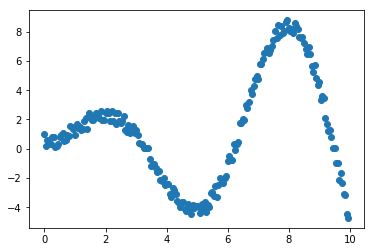

In [18]:
import matplotlib.pyplot as plt


_ = plt.scatter(X, Y)

plt.show()

In [19]:
# Unscaled features
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import math

def quadrant(coords):
    EW = 'W' if coords[0] < 0 else 'E'
    NS = 'S' if coords[1] < 1 else 'N'
    
N = 10000
x = -0.1 + np.random.sample(N) * 1.1
y = -5000 + np.random.sample(N) * 10000

xy_coords = list(zip(x, y))
quadrant = list(map(quadrant, xy_coords))

model = RandomForestClassifier()
model = model.fit(xy_coords, quadrant)

ValueError: Unknown label type: 'unknown'

https://github.com/NathanEpstein/pydata-london

# Random Forests and Ensemble Learning

## [Slides](https://github.com/cs109/2015/blob/master/Lectures/12-Ensemble%20Learning%20and%20Random%20Forests.pdf)

- [random forest layman example](https://www.quora.com/How-does-randomization-in-a-random-forest-work/answer/Edwin-Chen-1)

# Boosting
- Also ensemble method like Bagging
- However:
    - weak learners evolve over time
    - votes are weighted
- Very popular method
- The hardest part of boosting to understand is, **How do you reweight the samples on each iteration.**

# Tuning Parameters for Boosting
- number of trees
- number of splits in each tree (often _stumps_ work well)
- parameters controlling how weights evolve

- [AdaBoost](https://en.wikipedia.org/wiki/AdaBoost) is a very popular Boosting Algorithm.

[Gradient Boosting from scratch](https://medium.com/mlreview/gradient-boosting-from-scratch-1e317ae4587d)